<a href="https://colab.research.google.com/github/zakaria-aabbou/Reinforcement_learning/blob/main/Reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries:**

In [ ]:
import base
import numpy as np
import matplotlib.pyplot as plt

# **Exercice 1:**

La fonction que nous avons défini a pour but de calculer l'erreur de prédiction des algorithmes. 

In [ ]:
def ipe(policy, env, gamma, epsilon=0.001):
    v = np.zeros((env.get_nb_states()))
    q = np.sum(env.p()*(env.r() + gamma * v[np.newaxis, np.newaxis, :]), axis=2)
    nv = np.sum(policy * q, axis=1)
    delta = np.sum(np.abs(nv-v))

    while delta > epsilon:
        v = nv
        q = np.sum(env.p()*(env.r() + gamma * v[np.newaxis, np.newaxis, :]), axis=2)
        nv = np.sum(policy * q, axis=1)
        delta = np.sum(np.abs(nv-v))
    
    return nv

##Question 1:
créer une politique pour maze en appliquant le principe suivant : dans chaque état appliquer les probabilités d'actions {W: 0.1, S:0.4, E:0.4, N:0.1}

In [ ]:
# l'environnement Maze env
env = base.Maze()

# La politique p:
p = np.zeros((env.get_nb_states(),env.get_nb_actions()))+np.array([0.1, 0.4,0.4,0.1])

## Question 2: 
Comparer MC prediction et TD(0): 

In [ ]:
def TD0_prediction(policy, env, gamma, alpha, nb_episodes):
    nba = env.get_nb_actions()
    nbs = env.get_nb_states()
    v = np.zeros((nbs))
    for ne in range(nb_episodes):
        state = env.reset()
        final = False      
        while not final:
            action = np.random.choice(nba, p=policy[state])
            ns, renf, final, _ = env.step(action)
            v[state] += alpha*( renf + (gamma*v[ns]) - v[state] )
            state = ns
            
    return v
def mc_prediction(policy, env, gamma, nb_episodes):
    nba = env.get_nb_actions()
    nbs = env.get_nb_states()
    
    for ne in range(nb_episodes):
        # Génération d'un épisode :
        episode = []
        state = env.reset()
        final = False
        while not final:
            action = np.random.choice(nba, p=policy[state])
            ns, renf, final, _ = env.step(action)
            episode.append([state, action, ns, renf])
            state = ns
        
        # Mise à jours des valeurs
        retour = 0
        compteur = np.zeros((nbs)) # compteur d'états
        somme = np.zeros((nbs)) # somme des valeurs d'états
        for s, a, ns, r in reversed(episode):
            retour = r + gamma * retour
            compteur[s] += 1
            somme[s] += retour
        
    v = somme.copy()
    for s in range(nbs):
        if compteur[s]>0:
            v[s] /= compteur[s]
    return v

Avec epsilon = 0.3, gamma = 0.4, on applique une prediction de V suivant notre politique p et l'algorithme TD0 avec les épisodes de 100 a 1500 ou le pas est de 200. On obtiendra le graph suivant:

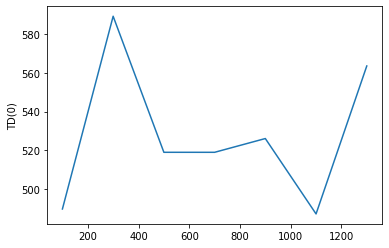

In [ ]:
X= np.array([])
Y= np.array([])
res1 = ipe(p, env, 0.3)
  
for x in range(100,1500,200):
  X=np.append(X,x)
  res = TD0_prediction(p,env,0.3,0.4,x)
  Y=np.append(Y,np.linalg.norm(res-res1))

plt.plot(X,Y)
plt.ylabel('TD(0)')
plt.show()

Avec gamma = 0.4, on applique une prediction de V suivant notre politique p et l'algorithme Monte Carlo avec les épisodes de 100 a 1500 ou le pas est de 200. On obtiendra le graph suivant:

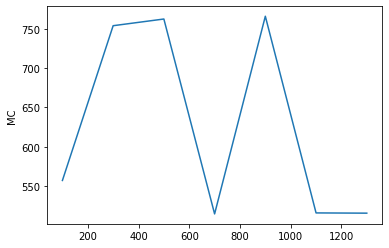

In [ ]:
X= np.array([])
Y= np.array([])
res1 = ipe(p, env, 0.3)
  
for x in range(100,1500,200):
  X=np.append(X,x)
  res = mc_prediction(p,env,0.4,x)
  Y=np.append(Y,np.linalg.norm(res-res1))

plt.plot(X,Y)
plt.ylabel('MC')
plt.show()

D'après les deux graphes nous constatons que la méthode Monte carlo a donné un meilleur résultat que celui TD(0) après l'épisode 1100.


## Question 3 : 
Implimentation des algorithmes TD0 nstep et Td(Lambda): 

In [ ]:
# 3. Implémentation de n-steps TD0 et TD(LAMBDA) : 


# TD0 : nstep:

def TD0_prediction_nstep(policy, env, gamma, alpha, nb_episodes, nstep):
    nba = env.get_nb_actions()
    nbs = env.get_nb_states()
    v = np.zeros((nbs))
    for ne in range(nb_episodes):
        step = 0
        state = env.reset()
        final = False
        
        while not final:
            action = np.random.choice(nba, p=policy[state])
            ns, renf, final, _ = env.step(action)
            somme = renf
            
            for i in range(nstep):
              action = np.random.choice(nba, p=policy[state])
              n, r, f, _ = env.step(action)
              somme = renf + gamma*somme
            
            v[state] += alpha*(somme - v[state] )  
            state = ns
            
    return v

# TD lambda 
def TDlambda_prediction(policy, env, gamma, alpha,nb_episodes, lamb):
    nba = env.get_nb_actions()
    nbs = env.get_nb_states()
    v = np.zeros((nbs))
    for ne in range(nb_episodes):
        state = env.reset()
        final = False
        E= np.zeros((nbs))
        while not final:
            action = np.random.choice(nba, p=policy[state])
            ns, renf, final, _ = env.step(action)
            delta = renf + gamma*v[ns] - v[state]
            for st in range(len(E)):
              if(st == state):
                E[st] = gamma * lamb * E[st] + 1
              else:
                E[st] = gamma * lamb * E[st] 
            for st in range(len(v)):
              v[st] += alpha*delta*E[st]
            
            state = ns
            
    return v

Avec gamma = 0.4, epsilon = 0.3 on applique une prediction de V suivant notre politique p et l'algorithme Monte Carlo avec les épisodes de 100 a 1600 ou le pas est de 100. On obtiendra le graph suivant:

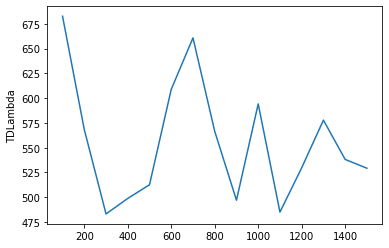

In [ ]:
X= np.array([])
Y= np.array([])
res1 = ipe(p, env, 0.3)
  
for x in range(100,1600,100):
  X=np.append(X,x)
  res = TDlambda_prediction(p,env,0.4,0.3,x,0.8)
  Y=np.append(Y,np.linalg.norm(res-res1))

plt.plot(X,Y)
plt.ylabel('TDLambda')
plt.show()

Avec gamma = 0.4, epsilon = 0.3 on applique une prediction de V suivant notre politique p et l'algorithme TD0 Nstep avec step = 2 avec les épisodes de 100 a 1600 ou le pas est de 100. On obtiendra le graph suivant:

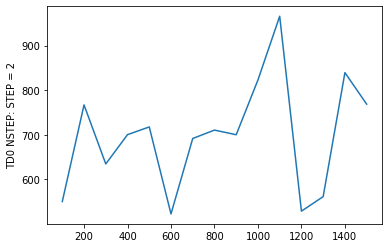

In [ ]:
X= np.array([])
Y= np.array([])
res1 = ipe(p, env, 0.3)
  
for x in range(100,1600,100):
  X=np.append(X,x)
  res = TD0_prediction_nstep(p,env,0.4,0.3,x,2)
  Y=np.append(Y,np.linalg.norm(res-res1))

plt.plot(X,Y)
plt.ylabel('TD0 NSTEP: STEP = 2')
plt.show()



Avec gamma = 0.4, epsilon = 0.3 on applique une prediction de V suivant notre politique p et l'algorithme TD0 Nstep avec step = 5 avec les épisodes de 100 a 1500 ou le pas est de 100. On obtiendra le graph suivant:

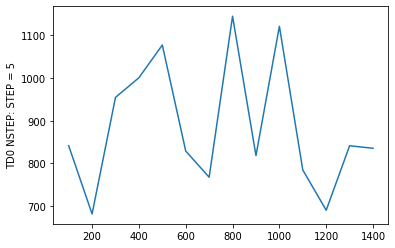

In [ ]:
X= np.array([])
Y= np.array([])
res1 = ipe(p, env, 0.3)
  
for x in range(100,1500,100):
  X=np.append(X,x)
  res = TD0_prediction_nstep(p,env,0.4,0.3,x,5)
  Y=np.append(Y,np.linalg.norm(res-res1))

plt.plot(X,Y)
plt.ylabel('TD0 NSTEP: STEP = 5')
plt.show()


Avec gamma = 0.4, epsilon = 0.3 on applique une prediction de V suivant notre politique p et l'algorithme TD0 Nstep avec step = 10 avec les épisodes de 100 a 1500 ou le pas est de 100. On obtiendra le graph suivant:

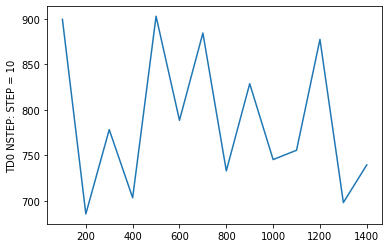

In [ ]:
X= np.array([])
Y= np.array([])
res1 = ipe(p, env, 0.3)
  
for x in range(100,1500,100):
  X=np.append(X,x)
  res = TD0_prediction_nstep(p,env,0.4,0.3,x,10)
  Y=np.append(Y,np.linalg.norm(res-res1))

plt.plot(X,Y)
plt.ylabel('TD0 NSTEP: STEP = 10')
plt.show()


D'après les graphes nous trouvons que la fonction lambda a donné de bon résultats que les autres et nous trouvons que plus le nombre de pas ' n_steps' déminue plus le résultat est bon.

# **Exercice 2:**

##Question 1: 
La réalisation MC-control, SARSA et Q-Learning avec la condition sur epsilon

In [ ]:
# 1-Comparaison de l'évolution des différents algorithmes en definant epsilon:


def greedy_decision(qvalues, state):
    return np.argmax(qvalues[state])

def greedy_policy(qvalues):
    policy = np.zeros(qvalues.shape)
    for s, va in enumerate(qvalues):
        policy[s, np.argmax(va)] = 1
    return policy

def egreedy_decision(qvalues, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(qvalues[state]))
    else:
        return np.argmax(qvalues[state])

def egreedy_policy(qvalues, epsilon):
    nbactions = qvalues.shape[1]
    policy = np.ones(qvalues.shape) * epsilon /nbactions
    for s, va in enumerate(qvalues):
        policy[s, np.argmax(va)] += 1 - epsilon
    return policy
    
    
def monte_carlo(env, gamma, nb_episodes, epsilon, T):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    n = np.zeros((env.get_nb_states(), nba))
    policy = np.ones((env.get_nb_states(), nba)) / nba
    t=0
    Action= np.array([])
    Recom= np.array([])
    for ne in range(nb_episodes):
        t+=1
        if(t>T):
          epsilon = epsilon/(np.sqrt(t-T)) 
        state = env.reset()
        episode = []
        nbr_a = 0
        nbr_r = 0
        while not env.is_final(state):
            action = np.random.choice(nba, p=policy[state])
            nvstate, r, _, _ = env.step(action)
            episode.append([state, action, nvstate, r])
            state = nvstate
            nbr_a +=1
            nbr_r +=r
        
        g = 0 # retour
        for s, a, ns, r in reversed(episode):
            g = r + gamma * g
            n[s, a] += 1
            q[s, a] += (g - q[s,a]) / n[s,a] 
        
        policy = egreedy_policy(q, epsilon)
        Recom = np.append(Recom,nbr_r)
        Action = np.append(Action,nbr_a)
    
    return q,Action,Recom

def sarsa(env, gamma, alpha, nb_episodes, epsilon,T):
    q = np.zeros((env.get_nb_states(), env.get_nb_actions()))
    t=0
    Action= np.array([])
    Recom= np.array([])
    for ne in range(nb_episodes):
        t+=1
        if(t>T):
          epsilon = epsilon/(np.sqrt(t-T))       
        state = env.reset()
        action = egreedy_decision(q, state, epsilon)
        nbr_a = 0
        nbr_r = 0
        while not env.is_final(state):
            nvstate, r, final, _ = env.step(action)
            nvaction = egreedy_decision(q, nvstate, epsilon)
            
            if final:
                target = r
            else:
                target = r + gamma * q[nvstate, nvaction]
            
            q[state, action] += alpha * (target - q[state, action])
            
            state = nvstate
            action = nvaction
            
            nbr_a+=1
            nbr_r+=r
        Recom = np.append(Recom,nbr_r)
        Action = np.append(Action,nbr_a)
    return q,Action,Recom
def q_learning(env, gamma, alpha, nb_episodes, epsilon,T):
    q = np.zeros((env.get_nb_states(), env.get_nb_actions()))
    t=0     
    Action= np.array([])
    Recom= np.array([])
    for ne in range(nb_episodes):
        t+=1
        if(t>T):
          epsilon = epsilon/(np.sqrt(t-T))
        state = env.reset()
        nbr_a = 0
        nbr_r = 0
        while not env.is_final(state):
            action = egreedy_decision(q, state, epsilon)
            nvstate, r, final, _ = env.step(action)
            
            if final:
                target = r
            else:
                target = r + gamma * np.max(q[nvstate])
            
            q[state, action] += alpha * (target - q[state, action])
            
            state = nvstate
            nbr_a+=1
            nbr_r+=1

        Action = np.append(Action,nbr_a)
        Recom  = np.append(Recom, nbr_r) 
    return q,Action,Recom

Application de monte carlo pour 100 épisodes, gamma = 0.9, nombre des episodes = 100, epsilon ) 0.1 et T = 50

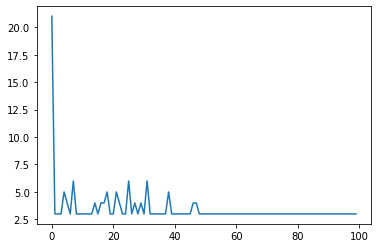

In [ ]:
#Apply Monte Carlo: 
q_mc,Action,Recomp = monte_carlo(env, 0.9, 100, 0.1,50)
p_mc = greedy_policy(q_mc)
p_mc

plt.plot(range(100),Action)

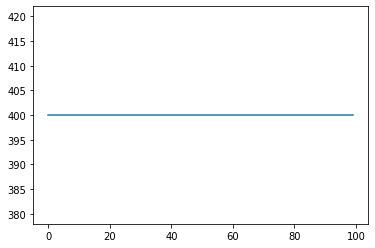

In [ ]:
plt.plot(range(100),Recomp)

Application de monte carlo pour 100 épisodes, gamma = 0.9, alpha = 0.8 nombre des episodes = 100, epsilon = 0.1 et T = 50

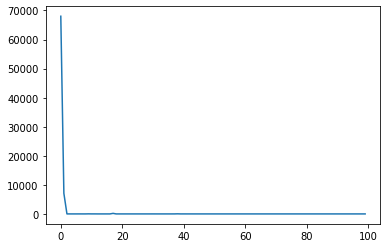

In [ ]:
#Apply Sarsa: 

q_sarsa,Action,Recomp = sarsa(env,0.9,0.8,100,0.1,50)
p_sarsa = greedy_policy(q_sarsa)
p_sarsa

plt.plot(range(100),Action)

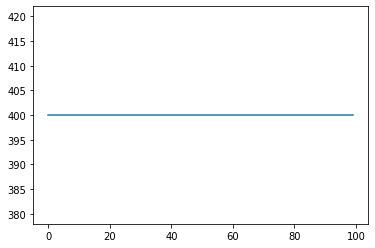

In [ ]:
plt.plot(range(100),Recomp)

Application de monte carlo pour 100 épisodes, gamma = 0.9, alpha = 0.8 nombre des episodes = 100, epsilon = 0.1 et T = 50

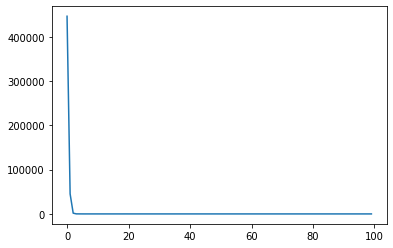

In [ ]:
#Apply Q_Learning: 

q_Ql,Action,Recomp = q_learning(env,0.9,0.8,100,0.1,50)
p_Ql = greedy_policy(q_Ql)

p_Ql
plt.plot(range(100),Action)

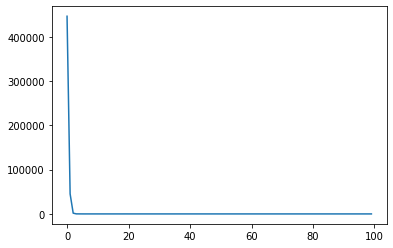

In [ ]:
plt.plot(range(100),Recomp)

##Question 2 : 
Tester et montrer les performances en utilisant d'autres moyens de gérer l'exploration

1- Implimentation de Softmax policy et decision:

In [ ]:
def Softmax_policy(qvalues,T=20):
    policy = np.zeros((env.get_nb_states(), env.get_nb_actions()))
    for s in range( len(qvalues) ):
      step = qvalues[s]
      for a in range( len(step) ):
        policy[s, a] = np.exp(qvalues(s,a)/T)/np.sum(np.exp( step/ T ) )
    return policy

def Softmax_decision(qvalues, state, T=20):
    policy = np.zeros(env.get_nb_actions())
    for  a in range ( len(qvalues[state]) ):
        policy[state, a] = np.exp(qvalues(state,a)/T)/np.sum(np.exp( qvalues[state]/ T ) )
    
    return np.random.choice(policy)


2- Implimentation des algorithmes de controle en utilisant les algorithmes de prédiction:

In [ ]:

#### Monte Carlo avec Softmax :
def monte_carloSM(env, gamma, nb_episodes, epsilon, T,TEMP):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    n = np.zeros((env.get_nb_states(), nba))
    policy = np.ones((env.get_nb_states(), nba)) / nba
    t=0
    Action= np.array([])
    Recom= np.array([])
    for ne in range(nb_episodes):
        t+=1
        if(t>T):
          epsilon = epsilon/(np.sqrt(t-T)) 
        state = env.reset()
        episode = []
        nbr_a = 0
        nbr_r = 0
        while not env.is_final(state):
            action = np.random.choice(nba, p=policy[state])
            nvstate, r, _, _ = env.step(action)
            episode.append([state, action, nvstate, r])
            state = nvstate
            nbr_a +=1
            nbr_r +=r
        
        g = 0 # retour
        for s, a, ns, r in reversed(episode):
            g = r + gamma * g
            n[s, a] += 1
            q[s, a] += (g - q[s,a]) / n[s,a] 
        
        policy = Softmax_policy(q)
        Recom = np.append(Recom,nbr_r)
        Action = np.append(Action,nbr_a)
    
    return q,Action,Recom


###### Sarsa avec SoftMax:
def sarsaSM(env, gamma, alpha, nb_episodes, epsilon,T,TEMP):
    q = np.zeros((env.get_nb_states(), env.get_nb_actions()))
    t=0
    Action= np.array([])
    Recom= np.array([])
    for ne in range(nb_episodes):
        t+=1
        if(t>T):
          epsilon = epsilon/(np.sqrt(t-T))       
        state = env.reset()
        action = Softmax_decision(q, state, TEMP)
        nbr_a = 1
        nbr_r = 0
        while not env.is_final(state):
            nvstate, r, final, _ = env.step(action)
            nvaction = Softmax_decision(q, state, TEMP)
            
            if final:
                target = r
            else:
                target = r + gamma * q[nvstate, nvaction]
            
            q[state, action] += alpha * (target - q[state, action])
            
            state = nvstate
            action = nvaction
            
            nbr_a+=1
            nbr_r+=r
        Recom = np.append(X,nbr_r)
        Action = np.append(Action,nbr_a)
    return q,Action,Recom




###### Q_Learning avec SoftMax:
def q_learningSM(env, gamma, alpha, nb_episodes, epsilon,T,TEMP):
    q = np.zeros((env.get_nb_states(), env.get_nb_actions()))
    t=0     
    Action= np.array([])
    Recom= np.array([])
    for ne in range(nb_episodes):
        t+=1
        if(t>T):
          epsilon = epsilon/(np.sqrt(t-T))
        state = env.reset()
        nbr_a = 0
        nbr_r = 0
        while not env.is_final(state):
            action = Softmax_decision(q, state, TEMP)
            nvstate, r, final, _ = env.step(action)
            
            if final:
                target = r
            else:
                target = r + gamma * np.max(q[nvstate])
            
            q[state, action] += alpha * (target - q[state, action])
            
            state = nvstate
            nbr_a+=1
            nbr_r+=1

        Action = np.append(Action,nbr_a)
        Recom  = np.append(Recom, nbr_r) 
    return q,Action,Recom


## Question 3 : 
Reproduire ces tests dans les environnements : 


1. FrozenLake44: 

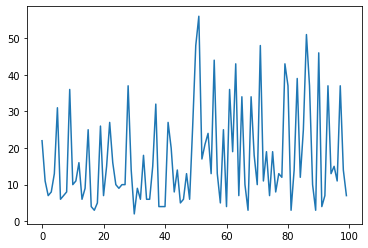

In [ ]:
env1 = base.FrozenLake44()
#Apply Monte Carlo: 
q_mc,Action,Recomp = monte_carlo(env1, 0.9, 100, 0.1,50)
p_mc = greedy_policy(q_mc)
p_mc

plt.plot(range(100),Action)

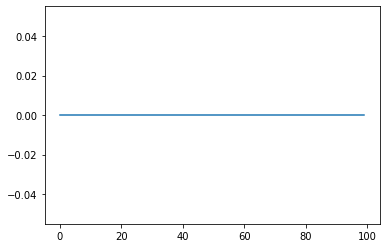

In [ ]:
plt.plot(range(100),Recomp)

In [ ]:
#Apply Sarsa: 

q_sarsa,Action,Recomp = sarsa(env1,0.9,0.8,100,0.1,50)
p_sarsa = greedy_policy(q_sarsa)
p_sarsa

plt.plot(range(100),Action)

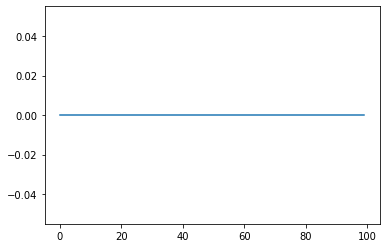

In [ ]:
plt.plot(range(100),Recomp)

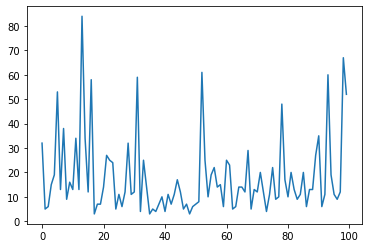

In [ ]:
#Apply Q_Learning: 

q_Ql,Action,Recomp = q_learning(env1,0.9,0.8,100,0.1,50)
p_Ql = greedy_policy(q_Ql)

p_Ql
plt.plot(range(100),Action)

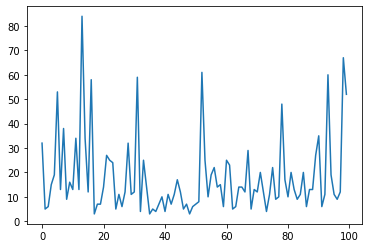

In [ ]:
plt.plot(range(100),Recomp)

2. FoorRooms_Key: 

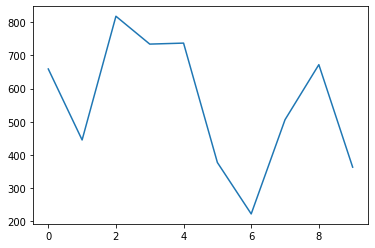

In [ ]:
env2 = base.FoorRooms_Key()
#Apply Monte Carlo: 
q_mc,Action,Recomp = monte_carlo(env2, 0.9, 10, 0.8,50)
p_mc = greedy_policy(q_mc)
p_mc

plt.plot(range(10),Action)

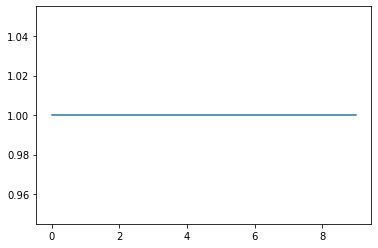

In [ ]:
plt.plot(range(10),Recomp)

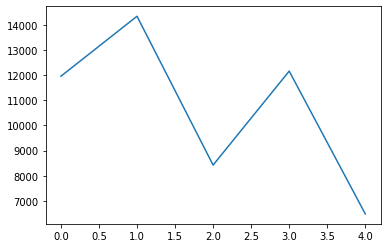

In [ ]:
#Apply Sarsa: 

q_sarsa,Action,Recomp = sarsa(env2,0.9,0.1,5,0.8,50)
p_sarsa = greedy_policy(q_sarsa)
p_sarsa

plt.plot(range(5),Action)

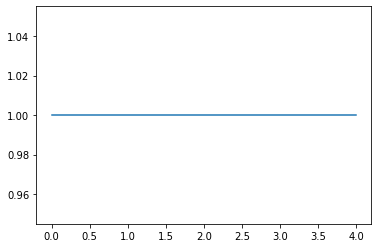

In [ ]:
plt.plot(range(5),Recomp)

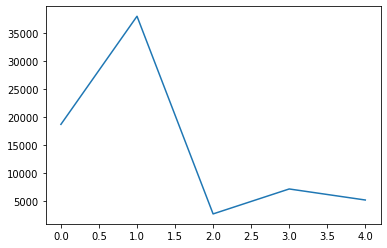

In [ ]:
#Apply Q_Learning: 

q_Ql,Action,Recomp = q_learning(env2,0.9,0.1,5,0.8,50)
p_Ql = greedy_policy(q_Ql)

p_Ql
plt.plot(range(5),Action)

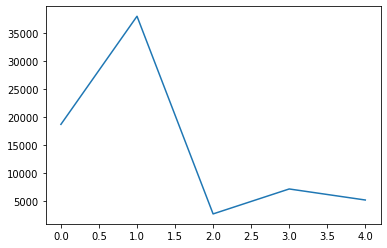

In [ ]:
plt.plot(range(5),Recomp)

Nous trouvonq ue la méthode q_learning a dnné de bons résultats, néanmoins la méthode monte carlo a donné le mauvais résultat sur les deux jeux de données.

Question 4 : Implémentation UCT : 

In [ ]:
from math import sqrt, log
from copy import deepcopy
from queue import Queue
from random import choice
from time import clock

class MCTSMeta:
    EXPLORATION = 0.5
    RAVE_CONST = 300
    RANDOMNESS = 0.5
    POOLRAVE_CAPACITY = 10
    K_CONST = 10
    A_CONST = 0.25
    WARMUP_ROLLOUTS = 7

In [ ]:
class Node:
    """
    Node pour les MCTS. Stocke le déplacement appliqué pour atteindre ce nœud depuis son parent,
     statistiques pour la position de jeu, les enfants, le parent et le résultat associés
     (résultat == aucun sauf si la position met fin à la partie).
     Args:
         move:
         parent:
         N (int): le temps où ce poste a été visité
         Q (int): récompense moyenne (victoires-pertes) de cette position
         Q_RAVE (int): le temps que ce mouvement a été critique dans un déploiement
         N_RAVE (int): le temps que ce mouvement est apparu dans un déploiement
         children (dict): dictionnaire des nœuds successifs
         résultat (entier): si le nœud est une feuille, le résultat indique
                        le gagnant, sinon Aucun
    """

    def __init__(self, move: tuple = None, parent: object = None):
        """
        Initialisez un nouveau nœud avec move et  parent facultatifs 
        et la liste des enfants initialement vides et les statistiques de déploiement 
        et un résultat non spécifié..
        """
        self.move = move
        self.parent = parent
        self.N = 0  # times this position was visited
        self.Q = 0  # average reward (wins-losses) from this position
        self.Q_RAVE = 0  # times this move has been critical in a rollout
        self.N_RAVE = 0  # times this move has appeared in a rollout
        self.children = {}
        self.outcome = GameMeta.PLAYERS['none']

    def add_children(self, children: dict) -> None:
        """
        Ajoutez une liste de nœuds aux enfants de ce nœud.
        """
        for child in children:
            self.children[child.move] = child

    @property
    def value(self, explore: float = MCTSMeta.EXPLORATION):
        """
        Calculez la valeur UCT de ce nœud par rapport à son parent, le paramètre 
        "explorer" spécifie dans quelle mesure la valeur doit favoriser les nœuds 
        qui n'ont pas encore été explorés de manière approfondie par rapport aux 
        nœuds qui semblent avoir un taux de réussite élevé.
         Actuellement, l'exploration est définie sur 0,5.
        """
        # if the node is not visited, set the value as infinity. Nodes with no visits are on priority
        # (lambda: print("a"), lambda: print("b"))[test==true]()
        if self.N == 0:
            return 0 if explore == 0 else GameMeta.INF
        else:
            return self.Q / self.N + explore * sqrt(2 * log(self.parent.N) / self.N)  # exploitation + exploration



In [ ]:
class UctMctsAgent:
    """
       Implémentation basique et sans fioritures d'un agent qui préforme MCTS pour hexagone.
     Les attributs:
         root_state (GameState): simulateur de jeu qui nous aide à comprendre la situation du jeu
         root (Node): racine de l'arborescence de recherche
         run_time (int): temps pour chaque exécution
         node_count (int): les nœuds entiers dans l'arbre
         num_rollouts (int): le nombre de déploiements pour chaque recherche
         EXPLORATION (int): spécifie dans quelle mesure la valeur devrait favoriser les nœuds qui 
         n'ont pas encore été explorés de manière approfondie par rapport aux 
         nœuds qui semblent avoir un taux de victoire élevé.
    """

    def search(self, time_budget: int) -> None:
        """
        Recherchez et mettez à jour l'arborescence de 
        recherche pendant une durée spécifiée en secondes.
        """
        start_time = clock()
        num_rollouts = 0

        # faire jusqu'à ce que nous dépassions notre budget de temps
        while clock() - start_time < time_budget:
            node, state = self.select_node()
            turn = state.turn()
            outcome = self.roll_out(state)
            self.backup(node, turn, outcome)
            num_rollouts += 1
        run_time = clock() - start_time
        node_count = self.tree_size()
        self.run_time = run_time
        self.node_count = node_count
        self.num_rollouts = num_rollouts

    def select_node(self) -> tuple:
        """
        Sélectionnez un nœud dans l'arborescence à partir duquel 
        effectuer une seule simulation.
        """
        node = self.root
        state = deepcopy(self.root_state)

        # arrêter si nous trouvons atteindre un nœud feuille
        while len(node.children) != 0:
            # descendre au nœud de valeur maximale, rompre les liens au hasard
            children = node.children.values()
            max_value = max(children, key=lambda n: n.value).value
            max_nodes = [n for n in node.children.values()
                         if n.value == max_value]
            node = choice(max_nodes)
            state.play(node.move)

            # si un nœud enfant n'a pas été exploré, sélectionnez-le avant de développer 
            # d'autres enfants
            if node.N == 0:
                return node, state

        # si nous atteignons un nœud feuille, générer ses enfants et renvoyer l'un d'eux
        # si le nœud est terminal, renvoyez simplement le nœud terminal
        if self.expand(node, state):
            node = choice(list(node.children.values()))
            state.play(node.move)
        return node, state

    
    @staticmethod
    def backup(node: Node, turn: int, outcome: int) -> None:
        """
        Mettre à jour les statistiques du nœud sur le chemin du nœud passé à la racine pour refléter
         le résultat d'une diffusion simulée au hasard.
         Args:
             node:
             turn: tour gagnant
             outcome: résultat du déploiement
         Returns:
             objet:
        """

        reward = 0 if outcome == turn else 1

        while node is not None:
            node.N += 1
            node.Q += reward
            node = node.parent
            reward = 0 if reward == 1 else 1

    def best_move(self) -> tuple:
        """
        Renvoie le meilleur coup en fonction de l'arborescence actuelle.
         Retourne:
             meilleur coup en termes de nombre de simulations à moins que le jeu ne soit terminé
        """
        if self.root_state.winner != GameMeta.PLAYERS['none']:
            return GameMeta.GAME_OVER

        # choisir le mouvement du nœud le plus simulé en cassant les liens au hasard
        max_value = max(self.root.children.values(), key=lambda n: n.N).N
        max_nodes = [n for n in self.root.children.values() if n.N == max_value]
        bestchild = choice(max_nodes)
        return bestchild.move

    def move(self, move: tuple) -> None:
        """
          Faites le déplacement passé et mettez à jour l'arborescence de manière appropriée. 
          Il est conçu pour permettre au joueur de choisir une action manuellement 
          (ce qui n'est peut-être pas la meilleure action).
    
          Args:
             move:
        """
        if move in self.root.children:
            child = self.root.children[move]
            child.parent = None
            self.root = child
            self.root_state.play(child.move)
            return

        self.root_state.play(move)
        self.root = Node()



    def statistics(self) -> tuple:
        return self.num_rollouts, self.node_count, self.run_time

    def tree_size(self) -> int:
        """
        Calcule nodes in tree by BFS.
        """
        Q = Queue()
        count = 0
        Q.put(self.root)
        while not Q.empty():
            node = Q.get()
            count += 1
            for child in node.children.values():
                Q.put(child)
        return count